# Neural & Behavioral Modeling - Week 5 (Exercises)
by Your Name (Your Email)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from scipy import *
from matplotlib.pyplot import *
from IPython.display import *
import scipy.stats as st
from scipy.special import erfc
from skimage import io
from scipy.optimize import curve_fit
from scipy.stats import exponnorm

## 1 Drifit Diffusion Model (5 points)

Use whatever analytical methods to check if Tren's super EZ implementation(s) of the drift diffusion model produce exGaussian data, especially the exponential long tail. Remember to play around with different model parameters to see how they affect simulation results.

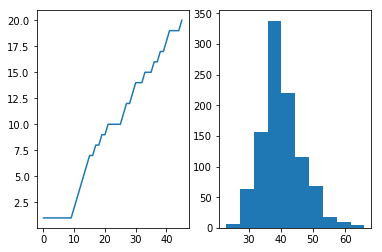

In [7]:
# Tren's implementation
mu,sigma=0.5,2 # Diffusion type1
p=0.5 # Diffusion type2
Yend=20 # Threshold for response
Ntrial=1000

RTs=zeros(Ntrial)
for i in range(Ntrial):
    Y=0 # initial drift position
    Ys=[] # drift history
    RT=0 # Reset watch
    while(Y<Yend):
        #dY=mu+random.normal(mu,sigma); # type1
        dY=float((random.rand(1)-p)>0); # type2
        Y=Y+dY
        Ys.append(Y); # Diffusion history in each trial
        RT=RT+1 # clock is running
    RTs[i]=RT;
subplot(1,2,1);plot(Ys) # plot only the last trial to see the diffusion process
subplot(1,2,2);hist(RTs);
#print(RTs)


(0, 66.0)

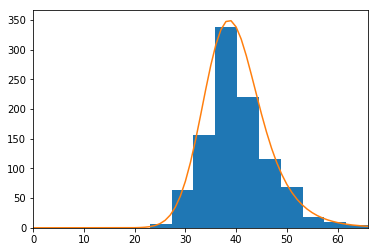

In [8]:
def getNormalQuantile(data,K):
    n= len(data)
    #range(n)
    gProb = (linspace(1,n,n)-0.5)/n # % assign prob.
    pQuantile = exponnorm.ppf(gProb,K)
    zData= (data - mean(data))/std(data)
    #[dummy, order]=sort(data)
    zQuantile=sorted(data)#zData(order)
    return pQuantile,zQuantile

param = exponnorm.fit(RTs)
#print(param)
#print(*param[:-2])
pdf_fitted = exponnorm.pdf(range(1000), param[0], loc=param[-2], scale=param[-1]) * Ntrial * 5
#print(pdf_fitted)
hist(RTs)
plot(pdf_fitted, label='exGaussian')
xlim(0,max(RTs))

In [9]:
qCorr=[]
alpha=0.05
for i in range(1000):
    simData = exponnorm.rvs(param[0], size=1000)
    zq,pq = getNormalQuantile(simData,param[:-2])
    qCorrT = corrcoef(zq,pq)
    #print(qCorrT[0,1])
    qCorr.append(qCorrT[0,1])

qrSort=sorted(qCorr) #print(qrSort)
criticalValue=qrSort[49]
print('CV =',criticalValue)
zqT,pqT = getNormalQuantile(RTs,param[:-2])
print('Coef =',corrcoef(zqT,pqT)[0,1])

CV = 0.9966004290350752
Coef = 0.9975467711261398


## 2 Choose ONE of the following tasks (5 points):

(1) Port EZdata.m from Matlab to Python

(2) Port dataEz.m from Matlab to Python

(3) Provide an intuitive explanation about the form of exGuassian's probability density function (PDF).

<font color="grey">(Mathemaitcal derivation of that PDF may help you to figure out what's going on but please try to explain the whole thing in plain English.)</font>